# The Olympic Dataset Exploration

This python module is developed for exploring the olympics dataset that has the data for the past 120 years and to derive insights from it. 

In [1]:
# Importing the necessary libraries
import pandas as pd

In [2]:
# Reading the dataset
olympic_data = pd.read_csv('athlete_events.csv')

In [3]:
# printing the first few records
olympic_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


We see tha the data has information about the athlete and whether they had won a medal or not. Let us see the columns that the dataset has.

In [4]:
# Columns available in the dataset
olympic_data_columns = olympic_data.columns.tolist()
olympic_data_columns

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

The data has 15 columns out of which 5 columns are numerical and the rest are all of categorical and string type.

In [5]:
# Getting data Stats
data_stats = olympic_data.describe()
data_stats

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Among the numerical columns, we see the range of values present. From the ID column, we see that the data has 271116 records. One interesting thing to note is that the maximum age of an olympian was 97! This could be an outlier or an actual value too!

In [6]:
# Getting the null count columnwise
column_null_counts = olympic_data.isnull().sum(axis=0)
column_null_counts

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

We see that there are a lot of missing data in the **Medal** column. This means that the particular athlete did not win a medal. Let us code it into a value called **No Medal**

In [7]:
# Filling the NA Values in Medal to 'No Medal'
olympic_data['Medal'] = olympic_data['Medal'].fillna(value='No Medal')
olympic_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


Let us remove the records that have null values and see how many records we are left with for our analysis

In [8]:
olympic_data = olympic_data.dropna()
olympic_data.shape

(206165, 15)

In [47]:
medal_data = olympic_data[olympic_data['Medal']!='No Medal']
medal_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


We are going to focus only on the data that has the 'Medal' column with Bronze/Silver/Gold. This is done to examine the characteristics of people who have won the medals.

In [10]:
len(medal_data['NOC'].unique())

143

## 1. How old do you have to be to win a medal?

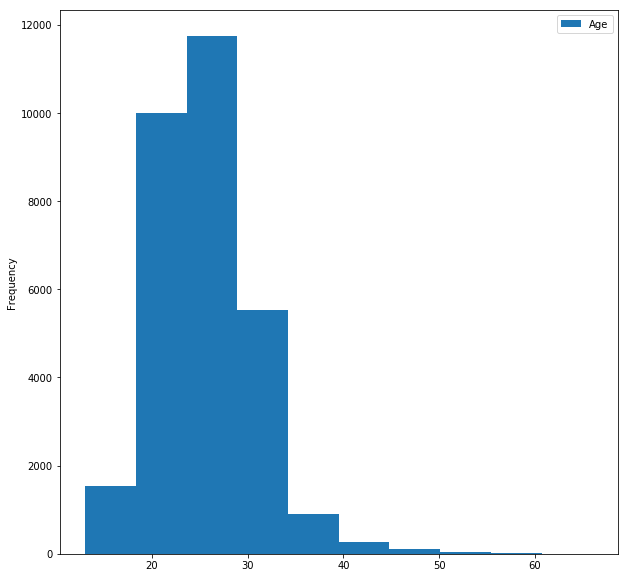

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
boxplot = medal_data.plot(y='Age', kind='hist', figsize=(10,10))

From the above plot, it is clear that the ideal age for an athlete to win an olympic medal is from 22 to 28 years. We also see some interesting numbers in the plot. The lower range starts from age close to 10 and the higher range is close to 38. It is fascinating to see that the athletes with the above ages have won the medal!
However, the ideal age to win a medal is 25 years.

## 2. Which Sport has the highest competition?

In [21]:
# Games with tough competition
participation_data = olympic_data.groupby('Sport')['ID'].agg('count')
top_comp_data = participation_data.sort_values(ascending=False).head(5)

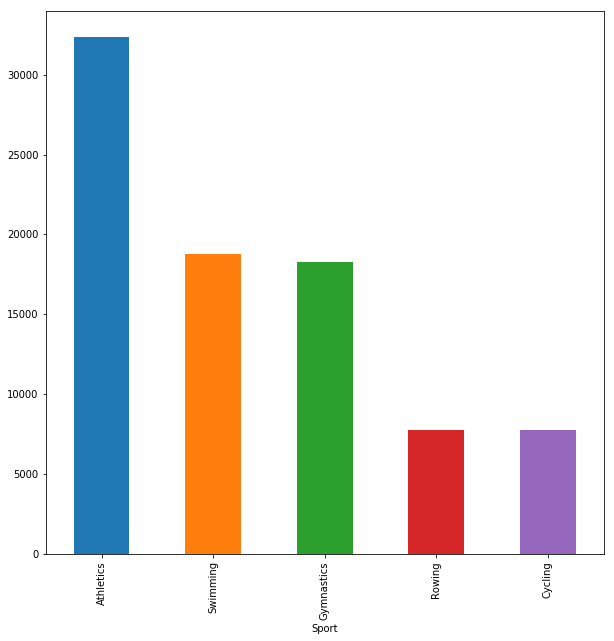

In [51]:
top_comp_data.plot(kind='bar', figsize=(10,10))

From the plot we observe that the sport of Athletics has the most competition followed by Swimming and Gymnastics. These are the games that need a lot of expertise in order to win a medal!

## 3. What's the ideal BMI to win?

In [26]:
def calculate_bmi(weight, height):
    """ 
    Calculates the bmi. 
    
    Parameters: 
    weight (float): weight of an individual in Kg.
    height (float): height of an individual in cm.
  
    Returns: 
    float: Body Mass Index (BMI) of a person  
    """
    return (weight / (height/100)**2)

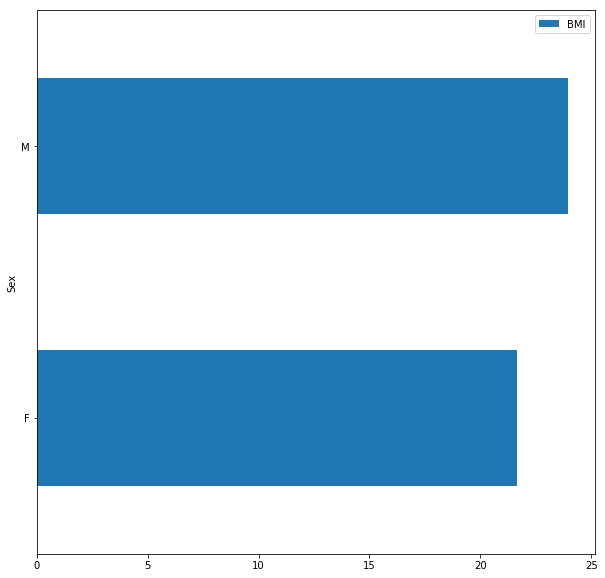

In [52]:
bmi_data = medal_data.groupby('Sex').apply(lambda x: calculate_bmi(x['Weight'],x['Height'])).reset_index()
average_bmis = bmi_data.groupby('Sex')[0].agg('mean')
average_bmis.reset_index().rename(columns={0:'BMI'}).plot(x='Sex',kind='barh', figsize=(10,10))

In [49]:
!jupyter nbconvert --to html olympic_dataset_exploration.ipynb

[NbConvertApp] Converting notebook olympic_dataset_exploration.ipynb to html
[NbConvertApp] Writing 331960 bytes to olympic_dataset_exploration.html
